<a href="https://colab.research.google.com/github/ahdann/Analisis-TURF/blob/main/TURF_Muhammad_Akhdan_A%60qil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS TURF
Muhammad Akhdan A`qil - 11220940000041


In [4]:
file_path = '/content/Sumber Belajar.xlsx'
df = pd.read_excel(file_path)
df

,Mahasiswa,buku,jurnal,video,platform pembelajaran,diskusi
0,orang 1,1,1,0,0,0
1,orang 2,0,1,0,0,1
2,orang 3,1,0,0,1,0
3,orang 4,0,0,1,1,0
4,orang 5,0,0,1,0,1
5,orang 6,0,0,0,1,1


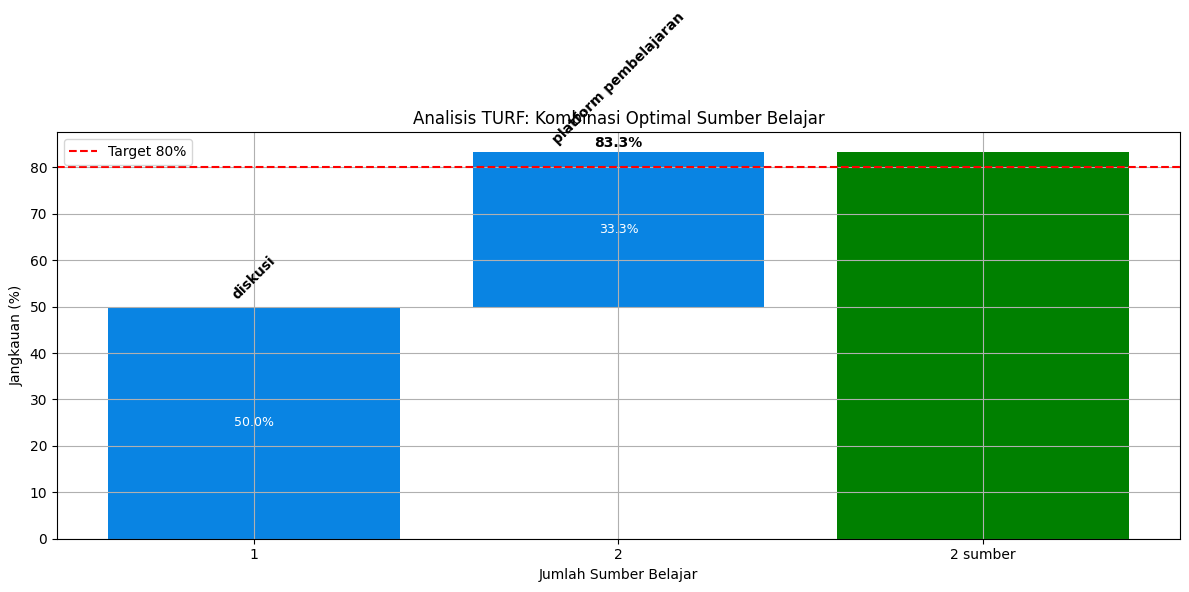

Untuk mencapai target 80%:
 Jumlah sumber belajar diperlukan: 2
 Sumber belajar terpilih: ['diskusi ', 'platform pembelajaran ']
 Total jangkauan tercapai: 83.33%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Asumsi kolom pertama adalah ID responden, kita bisa set sebagai index
# Dalam kasus ini, 'Mahasiswa ' adalah kolom ID responden
if 'Mahasiswa ' in df.columns: # Mengasumsikan 'Mahasiswa ' adalah kolom ID responden
    df.set_index("Mahasiswa ", inplace=True)
else:
    print("Kolom ID responden tidak ditemukan secara eksplisit. Menggunakan indeks default.")
    pass
# Identifikasi kolom-kolom yang relevan untuk analisis TURF
# Ini adalah kolom-kolom yang merepresentasikan sumber belajar dalam format biner (0 atau 1)
sumber_cols = []

# Kita akan mencari kolom yang bukan ID dan hanya berisi 0 dan 1
non_sumber_identifiers = ['Mahasiswa ', 'Jenjang Pendidikan', 'ID', 'Student_ID']
for col in df.columns:
    if col not in non_sumber_identifiers:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 2 and all(val in [0, 1] for val in unique_vals):
            sumber_cols.append(col)
if not sumber_cols:
    raise ValueError("Tidak ditemukan kolom sumber belajar biner (0/1) yang sesuai. "
                     "Pastikan file Anda memiliki kolom-kolom yang menunjukkan akses ke sumber belajar (nilai 0 atau 1).")
# Pilih hanya kolom sumber belajar untuk analisis TURF
df_turf = df[sumber_cols]
# PARAMETER TARGET REACH
target_pct = 0.80  # 80%
target_reach = int(target_pct * len(df_turf))
# Hitung reach tiap sumber belajar
reach_per_sumber = df_turf.sum().sort_values(ascending=False)

# Greedy algorithm
selected_sumber = []
current_reach_indices = set() # Menyimpan indeks responden yang sudah dijangkau
reach_progress = [] # Menyimpan persentase reach kumulatif
for sumber in reach_per_sumber.index:
    # Dapatkan indeks responden yang dijangkau oleh sumber saat ini
    newly_reached_indices = set(df_turf.index[df_turf[sumber] == 1])
    # Gabungkan jangkauan baru dengan jangkauan saat ini
    updated_reach_indices = current_reach_indices | newly_reached_indices
    # Tambahkan item hanya jika ia meningkatkan jangkauan unik
    # Atau jika ini adalah item pertama yang dipilih dan memiliki jangkauan
    if len(updated_reach_indices) > len(current_reach_indices) or (not selected_sumber and len(newly_reached_indices) > 0):
        selected_sumber.append(sumber)
        current_reach_indices = updated_reach_indices
    # Simpan progress reach setelah penambahan potensial
    # Penting: Ini mencerminkan reach kumulatif *setiap kali iterasi*, bukan hanya untuk item yang *terpilih*
    reach_progress.append(len(current_reach_indices) / len(df_turf))
    # Hentikan jika target reach sudah tercapai
    if len(current_reach_indices) >= target_reach:
        break
# Recalculate incrementals based on the *actual* selected_sumber list for the plot
# This ensures that incrementals only reflect the items that were actually added to `selected_sumber`.
final_reach_progress_for_plot = []
temp_reach_set = set()
for item in selected_sumber:
    temp_reach_set.update(set(df_turf.index[df_turf[item] == 1]))
    final_reach_progress_for_plot.append(len(temp_reach_set) / len(df_turf))
incrementals = [final_reach_progress_for_plot[0]] + [final_reach_progress_for_plot[i] - final_reach_progress_for_plot[i-1] for i in range(1, len(final_reach_progress_for_plot))]

# Visualisasi
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    # Membersihkan nama sumber untuk label plot
    clean_sumber_name = selected_sumber[i].strip() # Menghapus spasi di awal/akhir jika ada
    plt.bar(str(i+1), inc * 100, bottom=bottoms, color="#0984e3")
    # Tambahkan persentase incremental reach di tengah bar
    plt.text(i, bottoms + (inc*100)/2, f"{inc*100:.1f}%", ha='center', va='center', fontsize=9, color='white')
    # Tambahkan nama sumber di atas bar (diputar jika panjang)
    plt.text(i, bottoms + inc*100 + 1, clean_sumber_name, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
    bottoms += inc * 100
plt.axhline(y=target_pct*100, color='r', linestyle='--', label=f'Target {target_pct*100:.0f}%')
# Total reach bar
final_actual_reach = len(current_reach_indices) / len(df_turf)
plt.bar(f"{len(selected_sumber)} sumber", final_actual_reach*100, color="green")
plt.text(len(selected_sumber)-1, final_actual_reach*100 + 1, f"{final_actual_reach*100:.1f}%", ha='center', fontsize=10, fontweight='bold')


plt.xlabel("Jumlah Sumber Belajar")
plt.ylabel("Jangkauan (%)")
plt.title("Analisis TURF: Kombinasi Optimal Sumber Belajar")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Hasil
print(f"Untuk mencapai target {target_pct*100:.0f}%:")
print(f" Jumlah sumber belajar diperlukan: {len(selected_sumber)}")
print(f" Sumber belajar terpilih: {selected_sumber}")
print(f" Total jangkauan tercapai: {final_actual_reach*100:.2f}%")